<a href="https://colab.research.google.com/github/noorasmat/Visualization-through-seaborn-and-pandas/blob/master/python_data_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This notebook demos Python data visualizations on the Iris dataset

This Python 3 environment comes with many helpful analytics libraries installed.  We'll use three libraries for this tutorial: [pandas](http://pandas.pydata.org/), [matplotlib](http://matplotlib.org/), and [seaborn](http://stanford.edu/~mwaskom/software/seaborn/).

In [0]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

#Next we will mount the drive for csv file of dataset
from google.colab import drive
drive.mount('/drive')

In [2]:
# Next, we'll load the Iris flower dataset, which is in the "../input/" directory
iris = pd.read_csv("/drive/My Drive/DataSets/Iris.csv") # the iris dataset is now a Pandas DataFrame

# Let's see what's in the iris data - Jupyter notebooks print the result of the last thing you do
iris.head()

# Top 5 rows of data frame are returned and stored in a new variable. 
# No parameter is passed to .head() method since by default it is 5.
#Defined in Pandas, Works with series

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Let's see how many examples we have of each species
iris["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [4]:
# Let's see how many examples we have of each species
iris["PetalWidthCm"].value_counts()

0.2    28
1.3    13
1.5    12
1.8    12
1.4     8
2.3     8
1.0     7
0.3     7
0.4     7
0.1     6
2.0     6
2.1     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: PetalWidthCm, dtype: int64

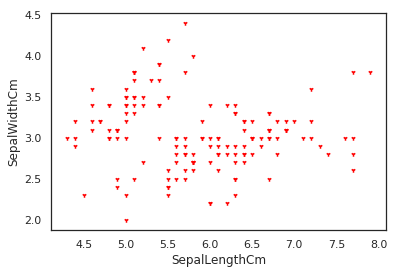

In [5]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm", marker="1", color='red')

# red dashes, blue squares and green triangles
#plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')

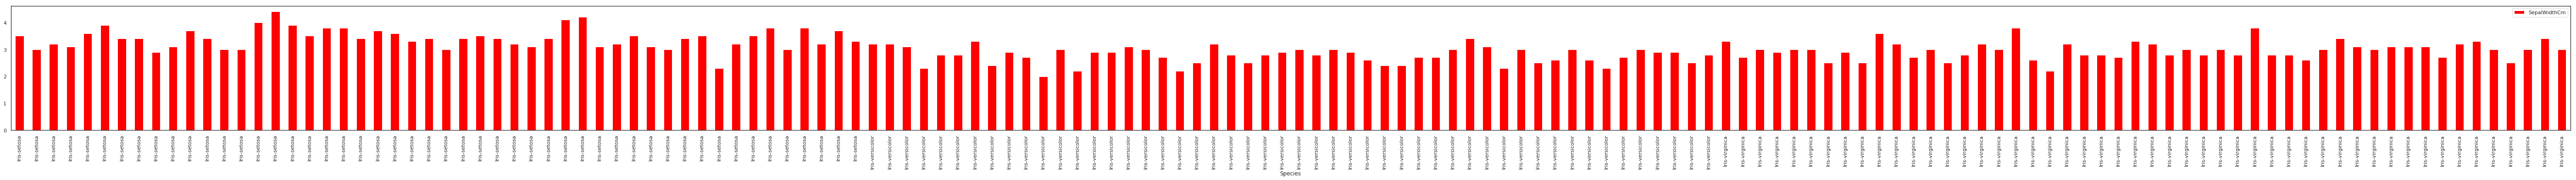

In [42]:
iris.plot(kind="bar", x="Species", y="SepalWidthCm", color='red', figsize=(100,5))

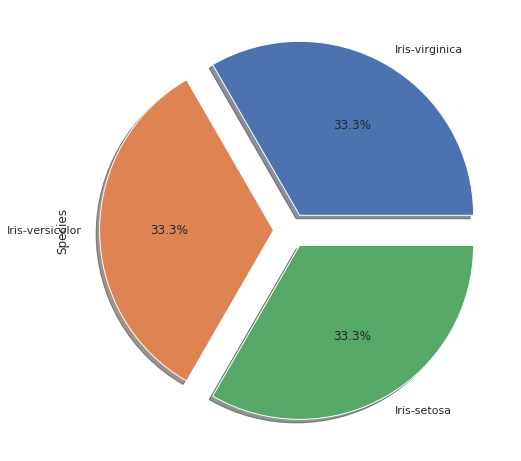

In [7]:
#f,ax=plt.subplots(1,2,figsize=(18,8))
iris['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
#iris['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
#ax[0].set_title('Iris Species Count')
#ax[0].set_ylabel('Count')
#sns.countplot('Species',data=iris,ax=ax[1])
#ax[1].set_title('Iris Species Count')
plt.show()

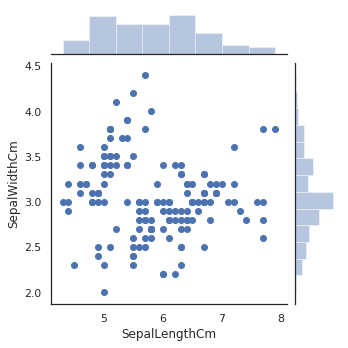

In [8]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)

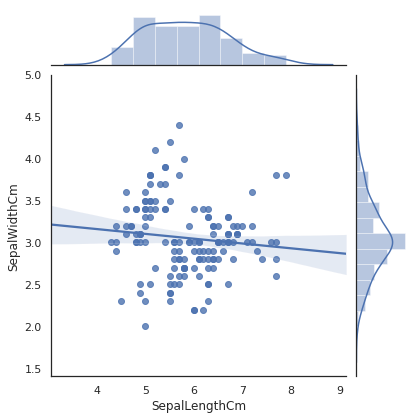

In [45]:
sns.jointplot("SepalLengthCm", "SepalWidthCm", data=iris, kind="reg")

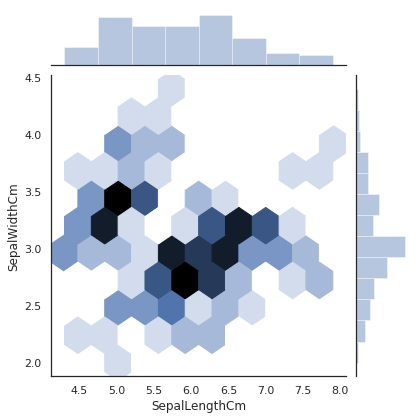

In [46]:
fig=sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',kind='hex',data=iris)

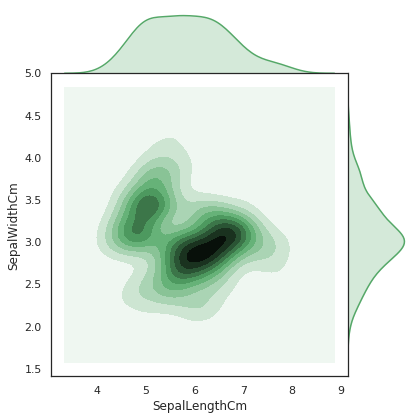

In [47]:
sns.jointplot("SepalLengthCm", "SepalWidthCm", data=iris, kind="kde",space=0,color='g')

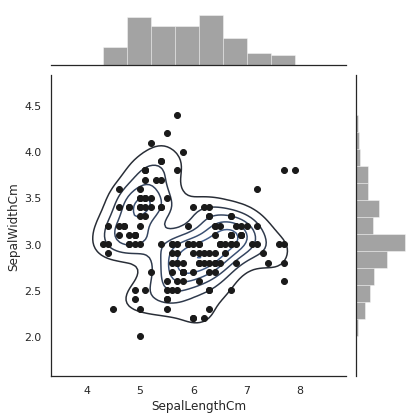

In [44]:
g = (sns.jointplot("SepalLengthCm", "SepalWidthCm",data=iris, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=6))

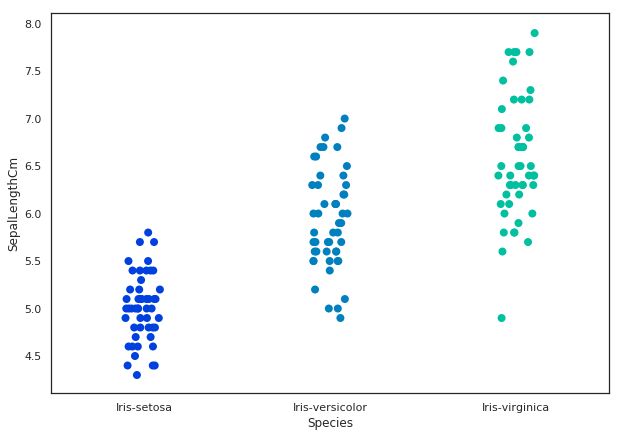

In [28]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.stripplot(x='Species',y='SepalLengthCm',data=iris,jitter=True,edgecolor='gray',size=8,palette='winter',orient='v')

Text(0.5, 1.0, 'General Statistics of Iris Dataset')

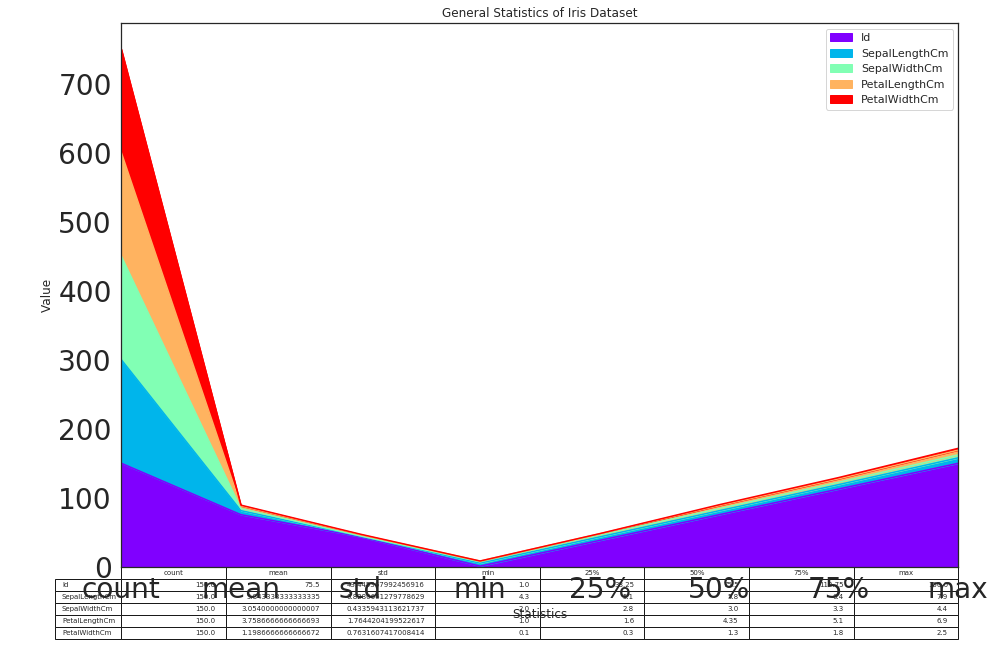

In [24]:
#Describing the data
iris.describe().plot(kind = "area", fontsize=28, figsize = (15,10), table = True, colormap="rainbow")
plt.xlabel('Statistics')
plt.ylabel('Value')
plt.title("General Statistics of Iris Dataset")

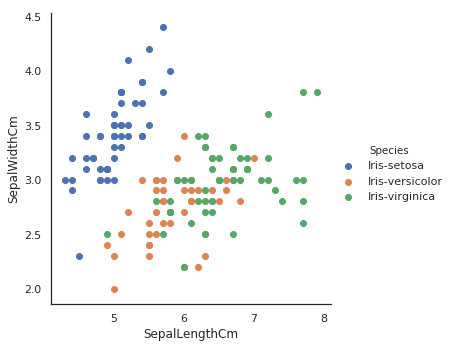

In [9]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

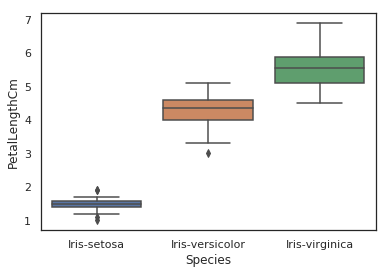

In [10]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

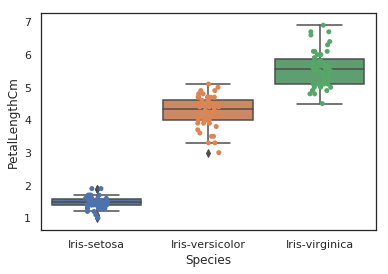

In [11]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

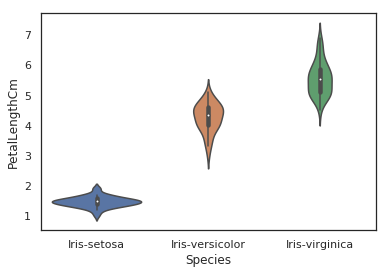

In [12]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)

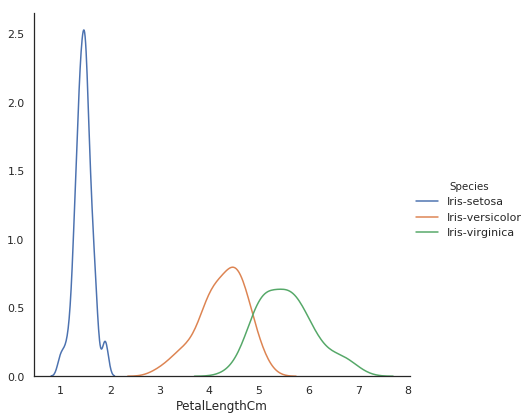

In [13]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

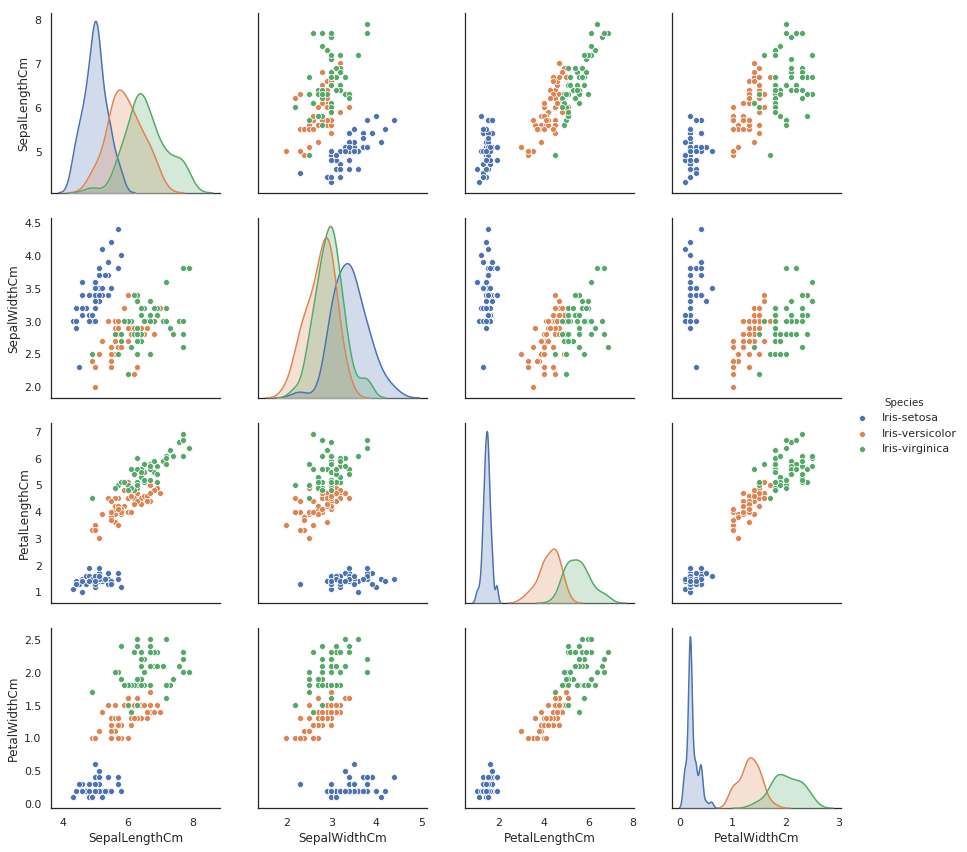

In [14]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

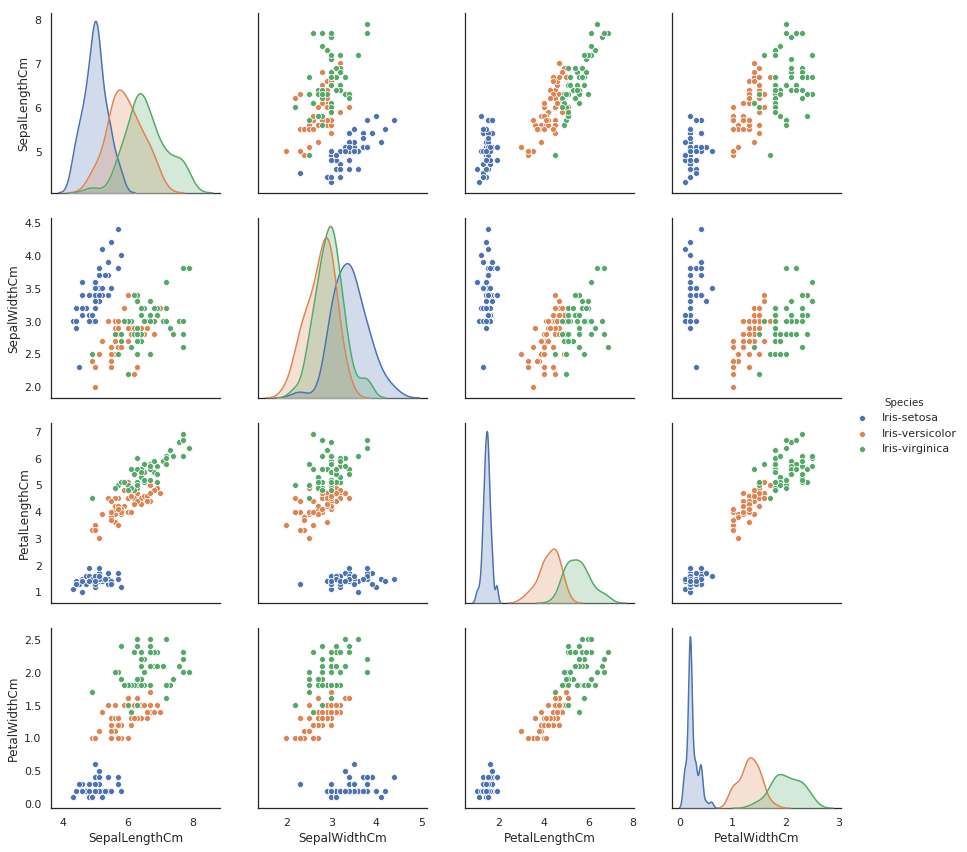

In [15]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9516417128>,
      dtype=object)

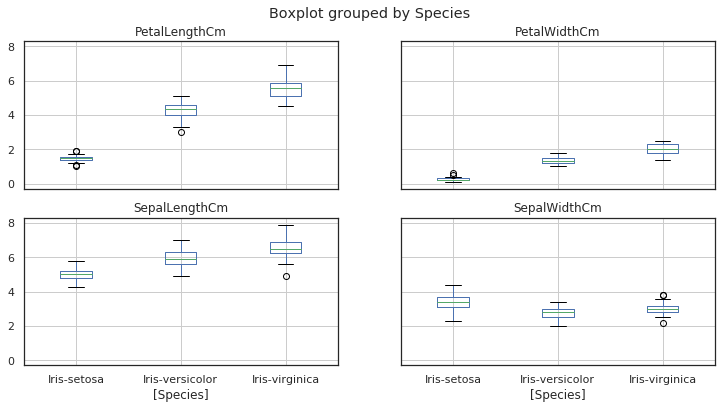

In [16]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

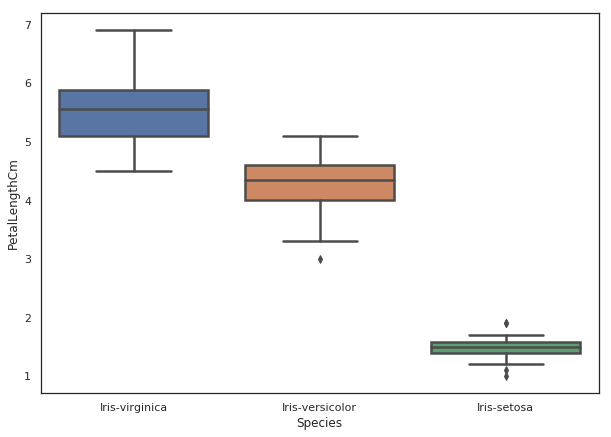

In [18]:
# Through sns
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='Species',y='PetalLengthCm',data=iris,order=['Iris-virginica','Iris-versicolor','Iris-setosa'],linewidth=2.5,orient='v',dodge=False)

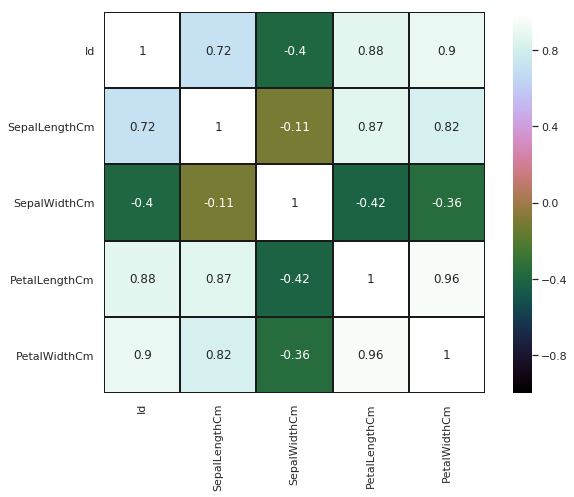

In [19]:
#Heat map Heat map is used to find out the correlation between different features in the dataset.
#High positive or negative value shows that the features have high correlation.
#This helps us to select the parmeters for machine learning.
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(iris.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

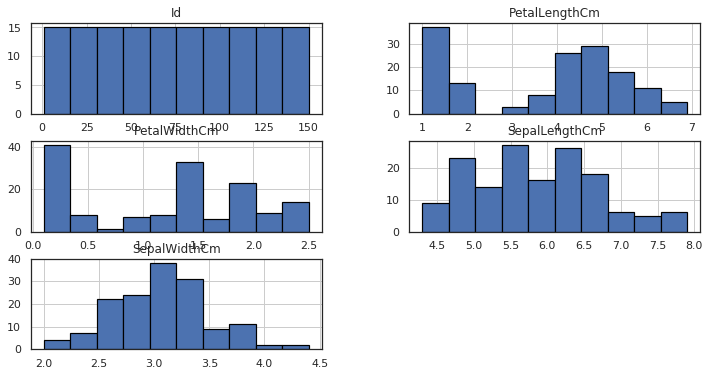

In [29]:
#The distribution plot is suitable for comparing range and distribution for groups of numerical data. 
#Data is plotted as value points along an axis. 
#You can choose to display only the value points to see the distribution of values, 
#a bounding box to see the range of values, or a combination of both as shown here.
#The distribution plot is not relevant for detailed analysis of the data as it deals with a summary of the data distribution.
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

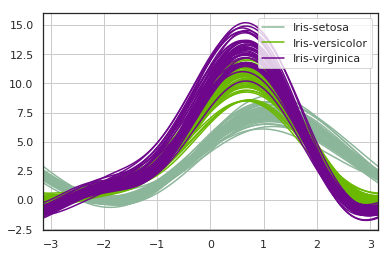

In [34]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these.
# a smoothened version of a parallel coordinate plot.In Pandas use Andrews Curves to plot and visualize data structure.
# Each multivariate observation is transformed into a curve and represents the coefficients of a Fourier series.
from pandas.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")

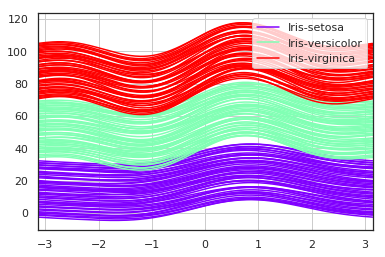

In [35]:
from pandas.plotting import andrews_curves
andrews_curves(iris,"Species",colormap='rainbow')
plt.show()
plt.ioff()

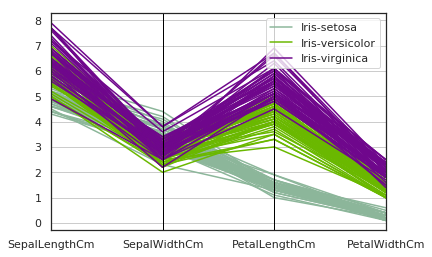

In [36]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species")

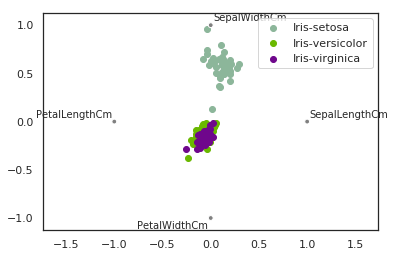

In [37]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")

# Wrapping Up

I hope you enjoyed this quick introduction to some of the quick, simple data visualizations you can create with pandas, seaborn, and matplotlib in Python!

I encourage you to run through these examples yourself, tweaking them and seeing what happens. From there, you can try applying these methods to a new dataset and incorprating them into your own workflow!
 